# **Lógica Fuzzy Exemplo do Aspirador de Pó**

**Antecedentes (entradas)**

**Superfície**: qual o nível de dificuldade da superfície, em uma escala de 0 a 5
- fácil, moderada, difícil

**Sujeira**: qual a quantidade de sujeira, em uma escala de 0 a 5
- leve, moderada, pesada

**Consequente (saída)**

**Sucção**: qual o nível de sucção que o aspirador de pó deve ser configurado, entre 0% e 10%
- baixa, média, alta

Regras
- Se a superfície for *fácil* e a sujeira for *leve* então a sucção será *baixa*
- Se a superfície for *moderada* e a sujeira for *leve* então a sucção será *média*
- Se a superfície for *difícil* ou a sujeira for *pesada* então a sucção será *alta*
- Se a superfície for *moderada* então a sucção será *média*

# Instalação e importação das bibliotecas

- Documentação: https://pythonhosted.org/scikit-fuzzy/overview.html

In [ ]:
!pip install scikit-fuzzy

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Antecedentes e consequente

In [3]:
np.arange(0,6,1)

array([0, 1, 2, 3, 4, 5])

In [4]:
superficie = ctrl.Antecedent(np.arange(0,6,1), 'superficie')
sujeira = ctrl.Antecedent(np.arange(0,6,1), 'sujeira')

In [5]:
superficie.universe

array([0, 1, 2, 3, 4, 5])

In [6]:
succao = ctrl.Consequent(np.arange(0,11,1), 'succao')
succao.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

## Membership functions

In [7]:
superficie.automf(number = 3, names = ['facil', 'moderada', 'dificil'])
sujeira.automf(number = 3, names = ['leve', 'moderada', 'pesada'])

t:\GitHub\College_tasks\venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


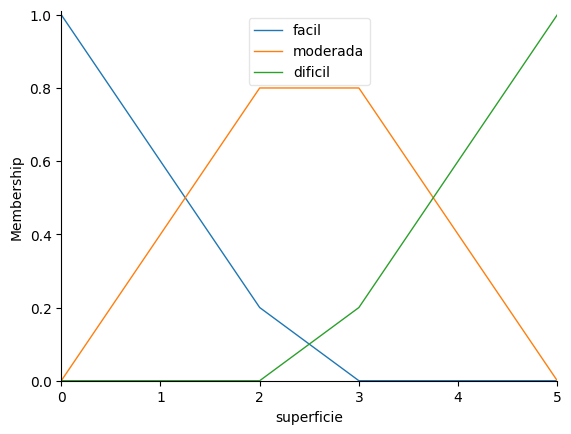

In [8]:
superficie.view()

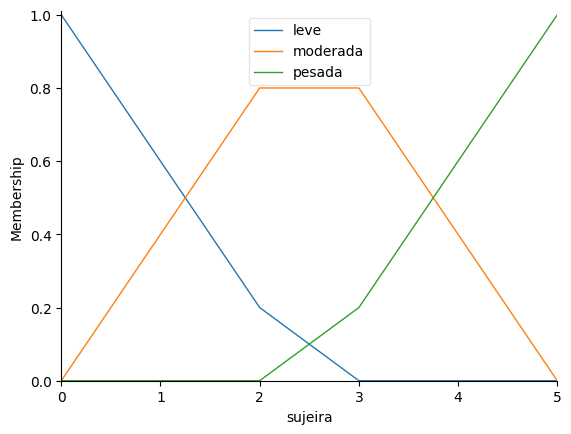

In [9]:
sujeira.view()

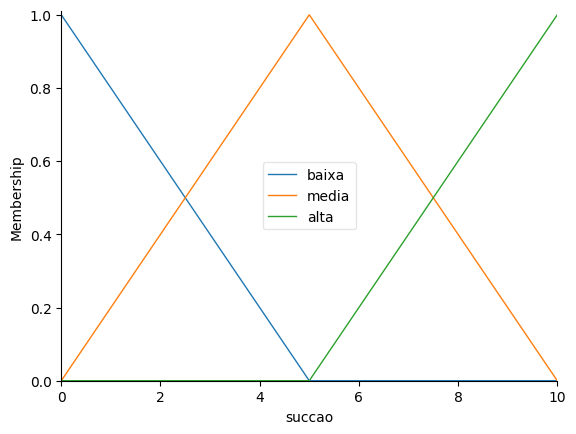

In [10]:
succao['baixa'] = fuzz.trimf(succao.universe, [0, 0, 5])
succao['media'] = fuzz.trimf(succao.universe, [0, 5, 10])
succao['alta'] = fuzz.trimf(succao.universe, [5, 10, 10])
succao.view()

In [11]:
regra1 = ctrl.Rule(superficie['facil'] & sujeira['leve'], succao['baixa'])
regra2 = ctrl.Rule(superficie['moderada'] & sujeira['leve'], succao['media'])
regra3 = ctrl.Rule(superficie['dificil'] | sujeira['pesada'], succao['alta'])
regra4 = ctrl.Rule(sujeira['moderada'], succao['media'])

## Sistema de controle

In [12]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3, regra4])
sistema = ctrl.ControlSystemSimulation(sistema_controle)

4.121951219512195


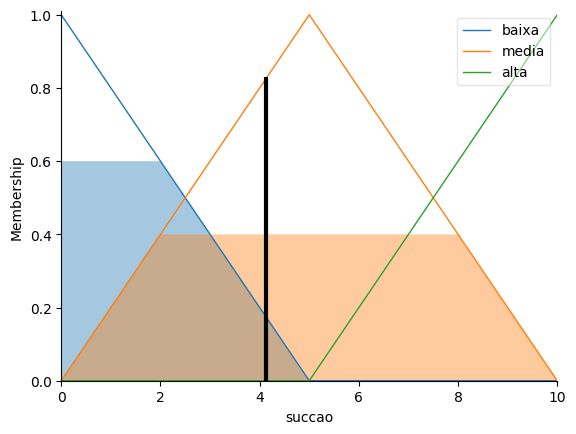

In [13]:
sistema.input['superficie'] = 1
sistema.input['sujeira'] = 0.5
sistema.compute()
print(sistema.output['succao'])
succao.view(sim = sistema)

# Outras funções

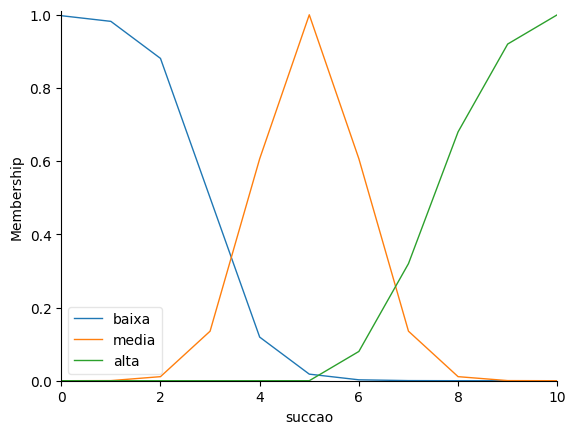

In [14]:
succao['baixa'] = fuzz.sigmf(succao.universe, 3, -2)
succao['media'] = fuzz.gaussmf(succao.universe, 5, 1)
succao['alta'] = fuzz.pimf(succao.universe, 5, 10, 10, 11)
succao.view()

In [15]:
regra1 = ctrl.Rule(superficie['facil'] & sujeira['leve'], succao['baixa'])
regra2 = ctrl.Rule(superficie['moderada'] & sujeira['leve'], succao['media'])
regra3 = ctrl.Rule(superficie['dificil'] | sujeira['pesada'], succao['alta'])
regra4 = ctrl.Rule(sujeira['moderada'], succao['media'])

In [16]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3, regra4])
sistema = ctrl.ControlSystemSimulation(sistema_controle)

8.509333333333334


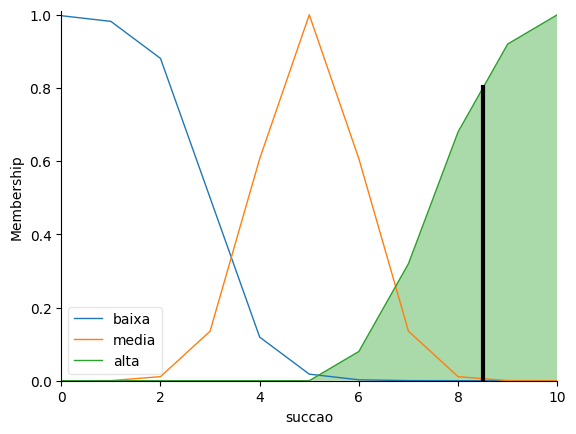

In [17]:
sistema.input['superficie'] = 5
sistema.input['sujeira'] = 5
sistema.compute()
print(sistema.output['succao'])
succao.view(sim = sistema)